# More Usage Examples

Here we simulate multivariate autoregressive processes from papers in order to show how various directed connectivity measures work. See the papers for details.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from spectral_connectivity import Connectivity, Multitaper
from spectral_connectivity.simulate import simulate_MVAR
from spectral_connectivity.transforms import prepare_time_series


def plot_directional(time_series, sampling_frequency, time_halfbandwidth_product=2):
    m = Multitaper(
        prepare_time_series(time_series),
        sampling_frequency=sampling_frequency,
        time_halfbandwidth_product=time_halfbandwidth_product,
        start_time=0,
    )
    c = Connectivity(
        fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time
    )

    measures = {
        "pairwise_spectral_granger": c.pairwise_spectral_granger_prediction(),
        "directed_transfer_function": c.directed_transfer_function(),
        "partial_directed_coherence": c.partial_directed_coherence(),
        "generalized_partial_directed_coherence": c.generalized_partial_directed_coherence(),
        "direct_directed_transfer_function": c.direct_directed_transfer_function(),
    }

    n_signals = time_series.shape[-1]
    signal_ind2, signal_ind1 = np.meshgrid(np.arange(n_signals), np.arange(n_signals))

    _fig, axes = plt.subplots(
        n_signals, n_signals, figsize=(n_signals * 3, n_signals * 3), sharex=True
    )
    for ind1, ind2, ax in zip(signal_ind1.ravel(), signal_ind2.ravel(), axes.ravel()):
        for measure_name, measure in measures.items():
            ax.plot(
                c.frequencies,
                measure[0, :, ind1, ind2],
                label=measure_name,
                linewidth=5,
                alpha=0.8,
            )
        ax.set_title(f"x{ind2 + 1} → x{ind1 + 1}", fontsize=15)
        ax.set_ylim((0, np.max([np.nanmax(np.stack(list(measures.values()))), 1.05])))

    axes[0, -1].legend()
    plt.tight_layout()

    __fig, axes = plt.subplots(1, 1, figsize=(3, 3), sharex=True, sharey=True)
    axes.plot(c.frequencies, c.power().squeeze())
    plt.title("Power")

## Baccala Example 2

> Baccalá, L.A., and Sameshima, K. (2001). Partial directed coherence:
    a new concept in neural structure determination. Biological
    Cybernetics 84, 463–474.


$$x_1 = 0.5x_1(n-1) + 0.3x_2(n-1) + 0.4x_3(n-1) + w_1(n)$$

$$x_2 = -0.5x_1(n-1) + 0.3x_2(n-1) + 1.0x_3(n-1) + w_2(n)$$

$$x_3 = -0.3x_2(n-1) - 0.2x_3(n-1) + w_3(n)$$

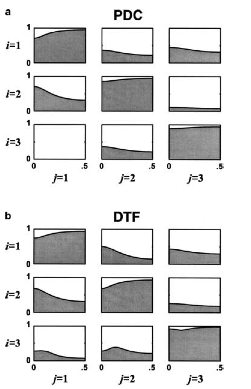

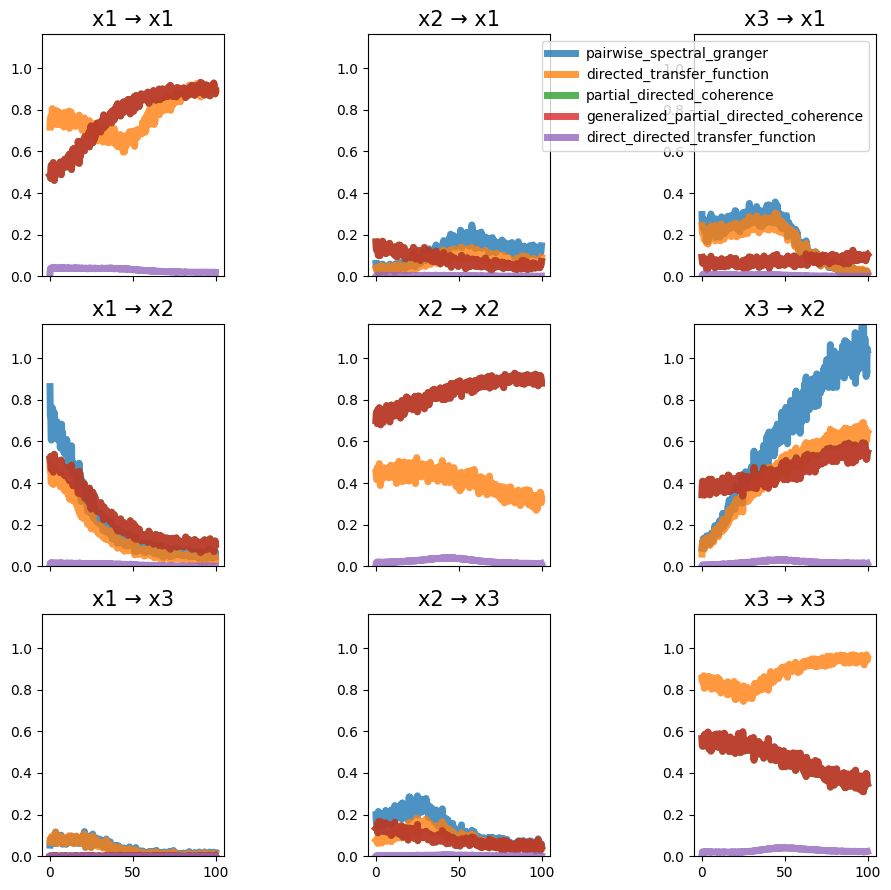

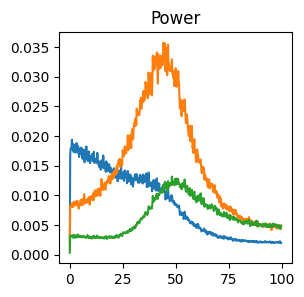

In [2]:
def baccala_example2():
    """Baccalá, L.A., and Sameshima, K. (2001). Partial directed coherence:
    a new concept in neural structure determination. Biological
    Cybernetics 84, 463–474.
    """
    sampling_frequency = 200
    n_time_samples, _n_lags, n_signals = 1000, 1, 3

    coefficients = np.array([[[0.5, 0.3, 0.4], [-0.5, 0.3, 1.0], [0.0, -0.3, -0.2]]])

    noise_covariance = np.eye(n_signals)

    return (
        simulate_MVAR(
            coefficients,
            noise_covariance=noise_covariance,
            n_time_samples=n_time_samples,
            n_trials=500,
            n_burnin_samples=500,
        ),
        sampling_frequency,
    )


plot_directional(*baccala_example2(), time_halfbandwidth_product=1)

## Baccala Example 3

> Baccalá, L.A., and Sameshima, K. (2001). Partial directed coherence:
    a new concept in neural structure determination. Biological
    Cybernetics 84, 463–474.

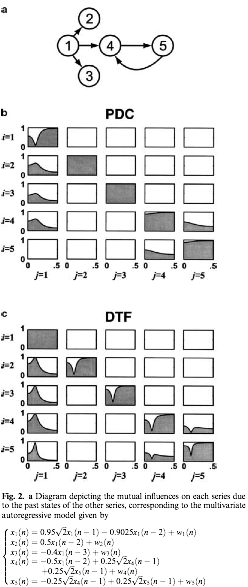

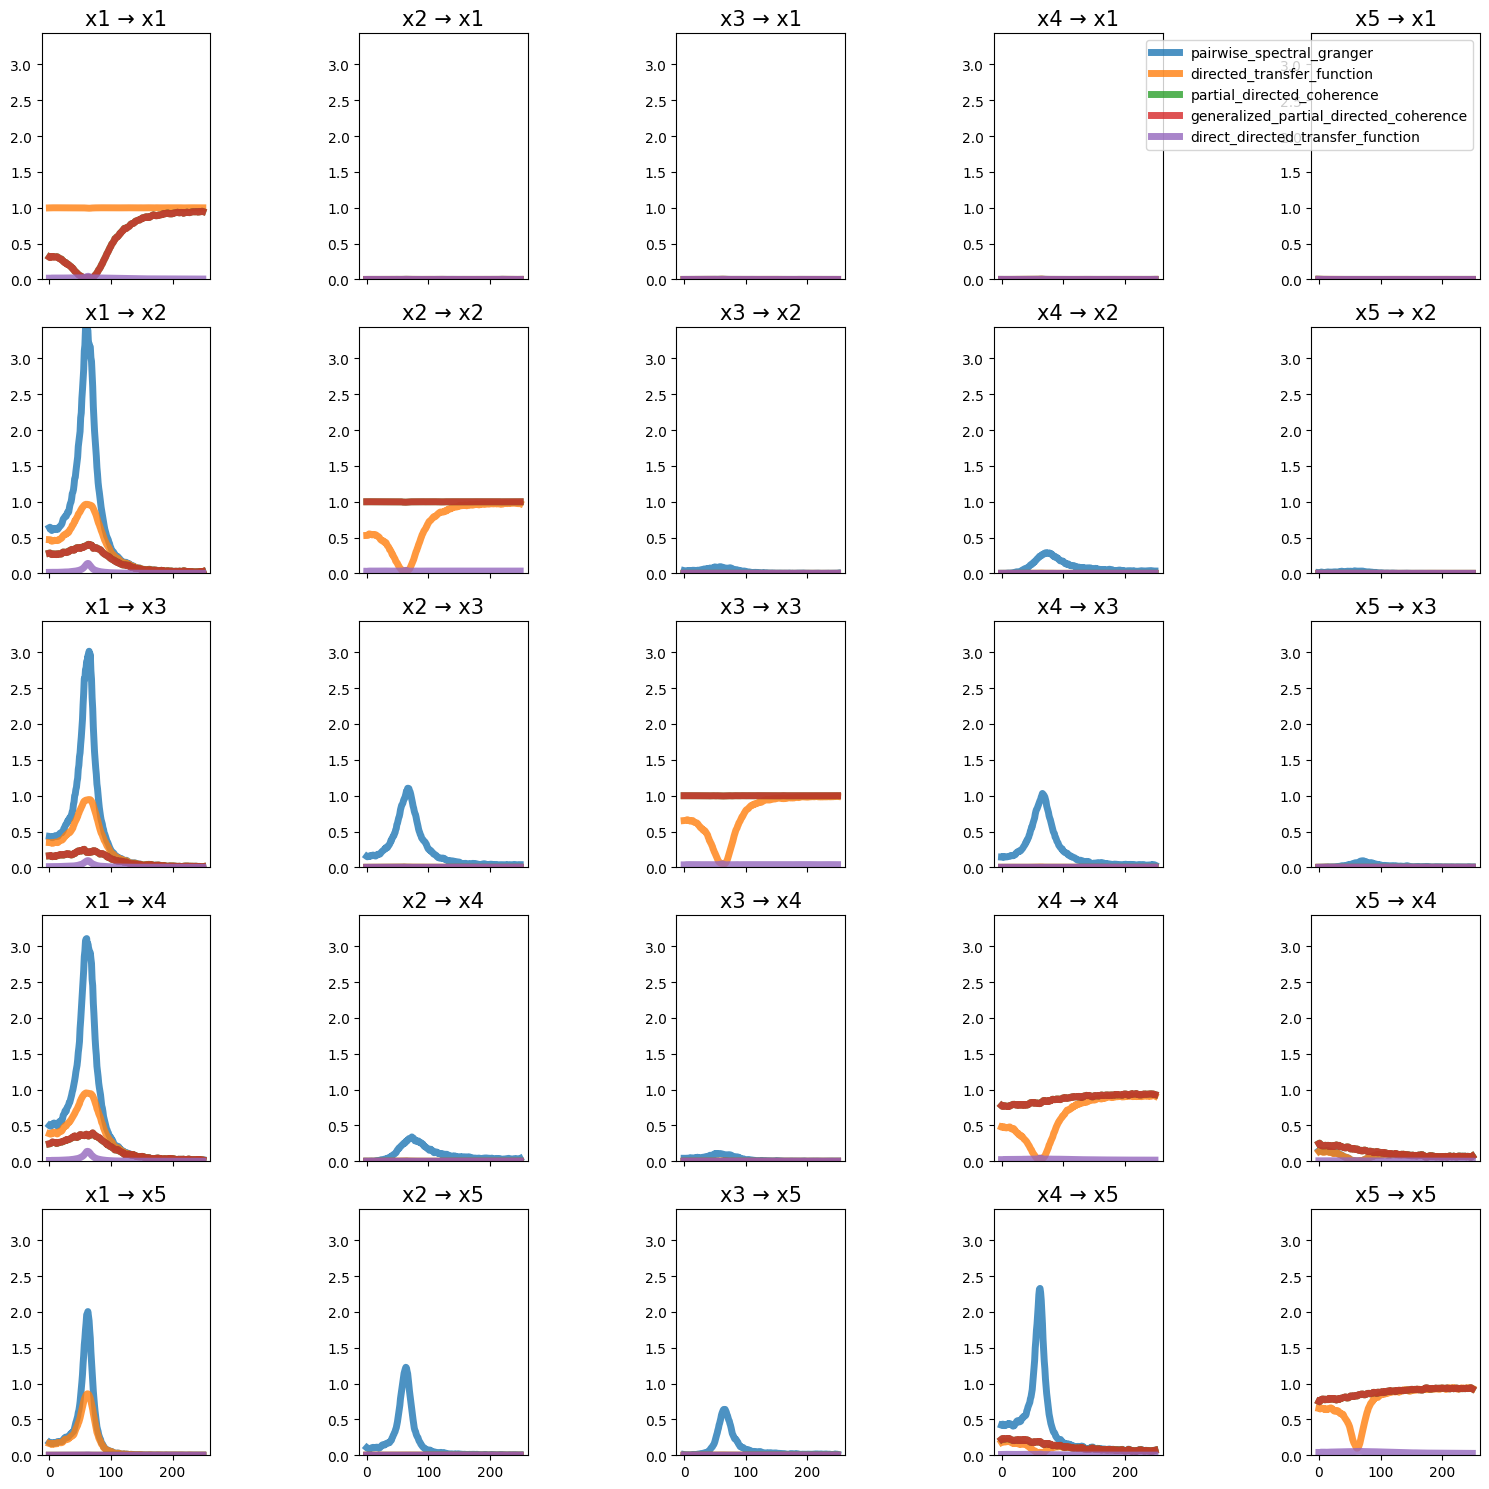

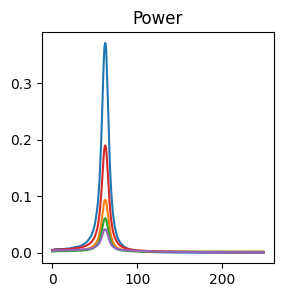

In [3]:
def baccala_example3():
    """Baccalá, L.A., and Sameshima, K. (2001). Partial directed coherence:
    a new concept in neural structure determination. Biological
    Cybernetics 84, 463–474.
    """
    sampling_frequency = 500
    n_time_samples, n_lags, n_signals = 510, 3, 5
    coefficients = np.zeros((n_lags, n_signals, n_signals))

    coefficients[0, 0, 0] = 0.95 * np.sqrt(2)
    coefficients[1, 0, 0] = -0.9025

    coefficients[1, 1, 0] = 0.50
    coefficients[2, 2, 0] = -0.40

    coefficients[1, 3, 0] = -0.5
    coefficients[0, 3, 3] = 0.25 * np.sqrt(2)
    coefficients[0, 3, 4] = 0.25 * np.sqrt(2)

    coefficients[0, 4, 3] = -0.25 * np.sqrt(2)
    coefficients[0, 4, 4] = 0.25 * np.sqrt(2)

    noise_covariance = None

    return (
        simulate_MVAR(
            coefficients,
            noise_covariance=noise_covariance,
            n_time_samples=n_time_samples,
            n_trials=500,
            n_burnin_samples=500,
        ),
        sampling_frequency,
    )


plot_directional(*baccala_example3(), time_halfbandwidth_product=3)

## Baccala Example 4

> Baccalá, L.A., and Sameshima, K. (2001). Partial directed coherence:
    a new concept in neural structure determination. Biological
    Cybernetics 84, 463–474.

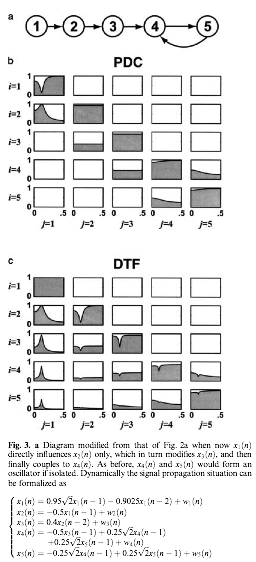

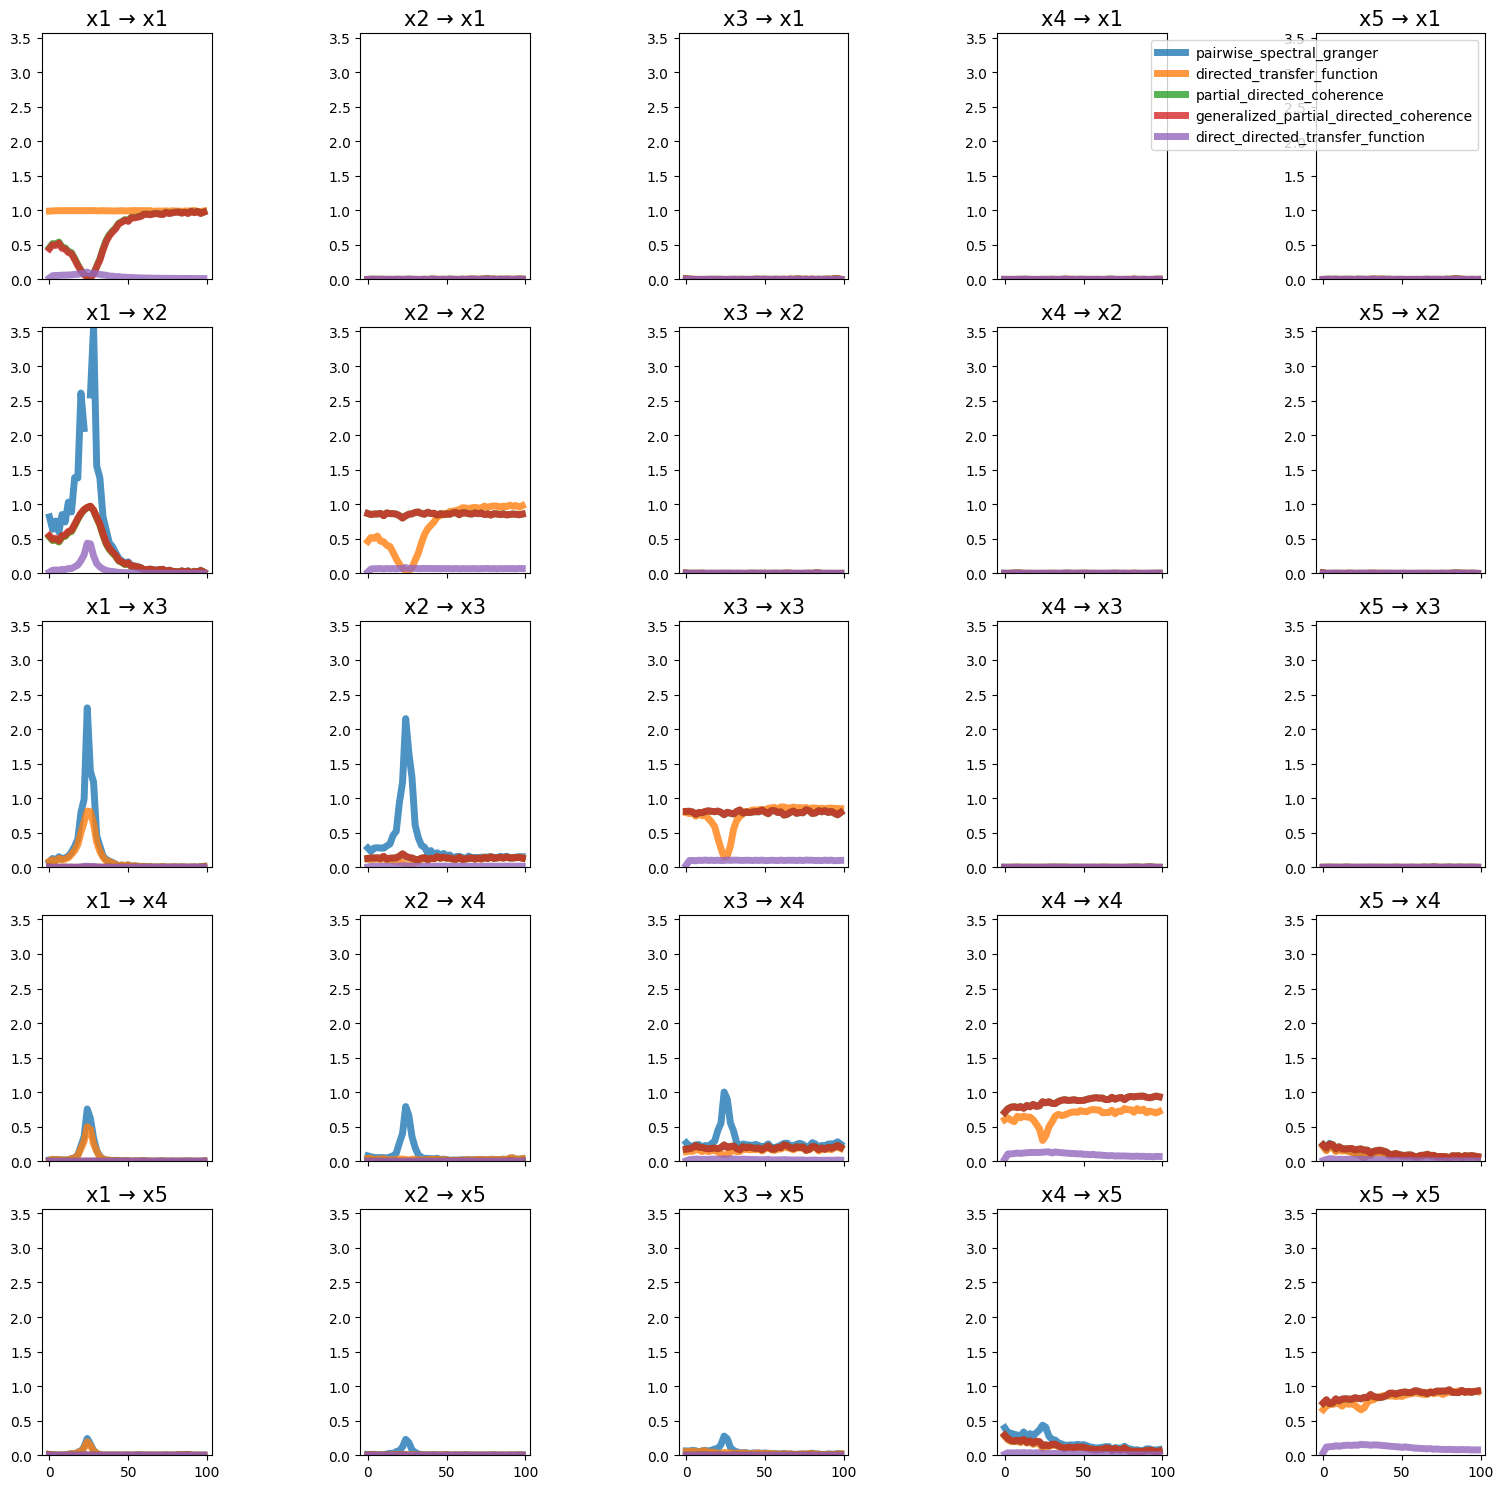

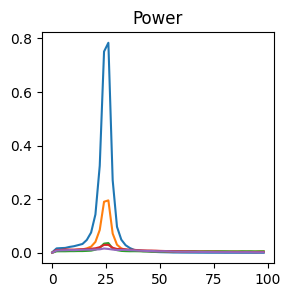

In [4]:
def baccala_example4():
    """Baccalá, L.A., and Sameshima, K. (2001). Partial directed coherence:
    a new concept in neural structure determination. Biological
    Cybernetics 84, 463–474.
    """
    sampling_frequency = 200
    n_time_samples, n_lags, n_signals = 100, 2, 5
    coefficients = np.zeros((n_lags, n_signals, n_signals))

    coefficients[0, 0, 0] = 0.95 * np.sqrt(2)
    coefficients[1, 0, 0] = -0.9025
    coefficients[0, 1, 0] = -0.50
    coefficients[1, 2, 1] = 0.40
    coefficients[0, 3, 2] = -0.50
    coefficients[0, 3, 3] = 0.25 * np.sqrt(2)
    coefficients[0, 3, 4] = 0.25 * np.sqrt(2)
    coefficients[0, 4, 3] = -0.25 * np.sqrt(2)
    coefficients[0, 4, 4] = 0.25 * np.sqrt(2)

    noise_covariance = None

    return (
        simulate_MVAR(
            coefficients,
            noise_covariance=noise_covariance,
            n_time_samples=n_time_samples,
            n_trials=500,
            n_burnin_samples=500,
        ),
        sampling_frequency,
    )


plot_directional(*baccala_example4(), time_halfbandwidth_product=1)

## Baccala Example 5

> Baccalá, L.A., and Sameshima, K. (2001). Partial directed coherence:
    a new concept in neural structure determination. Biological
    Cybernetics 84, 463–474.
    
 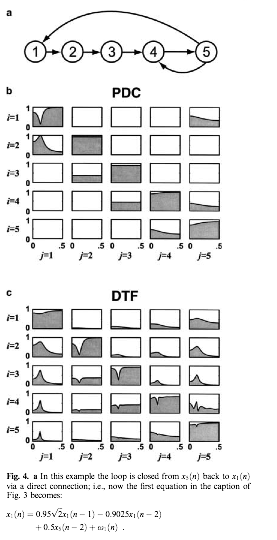

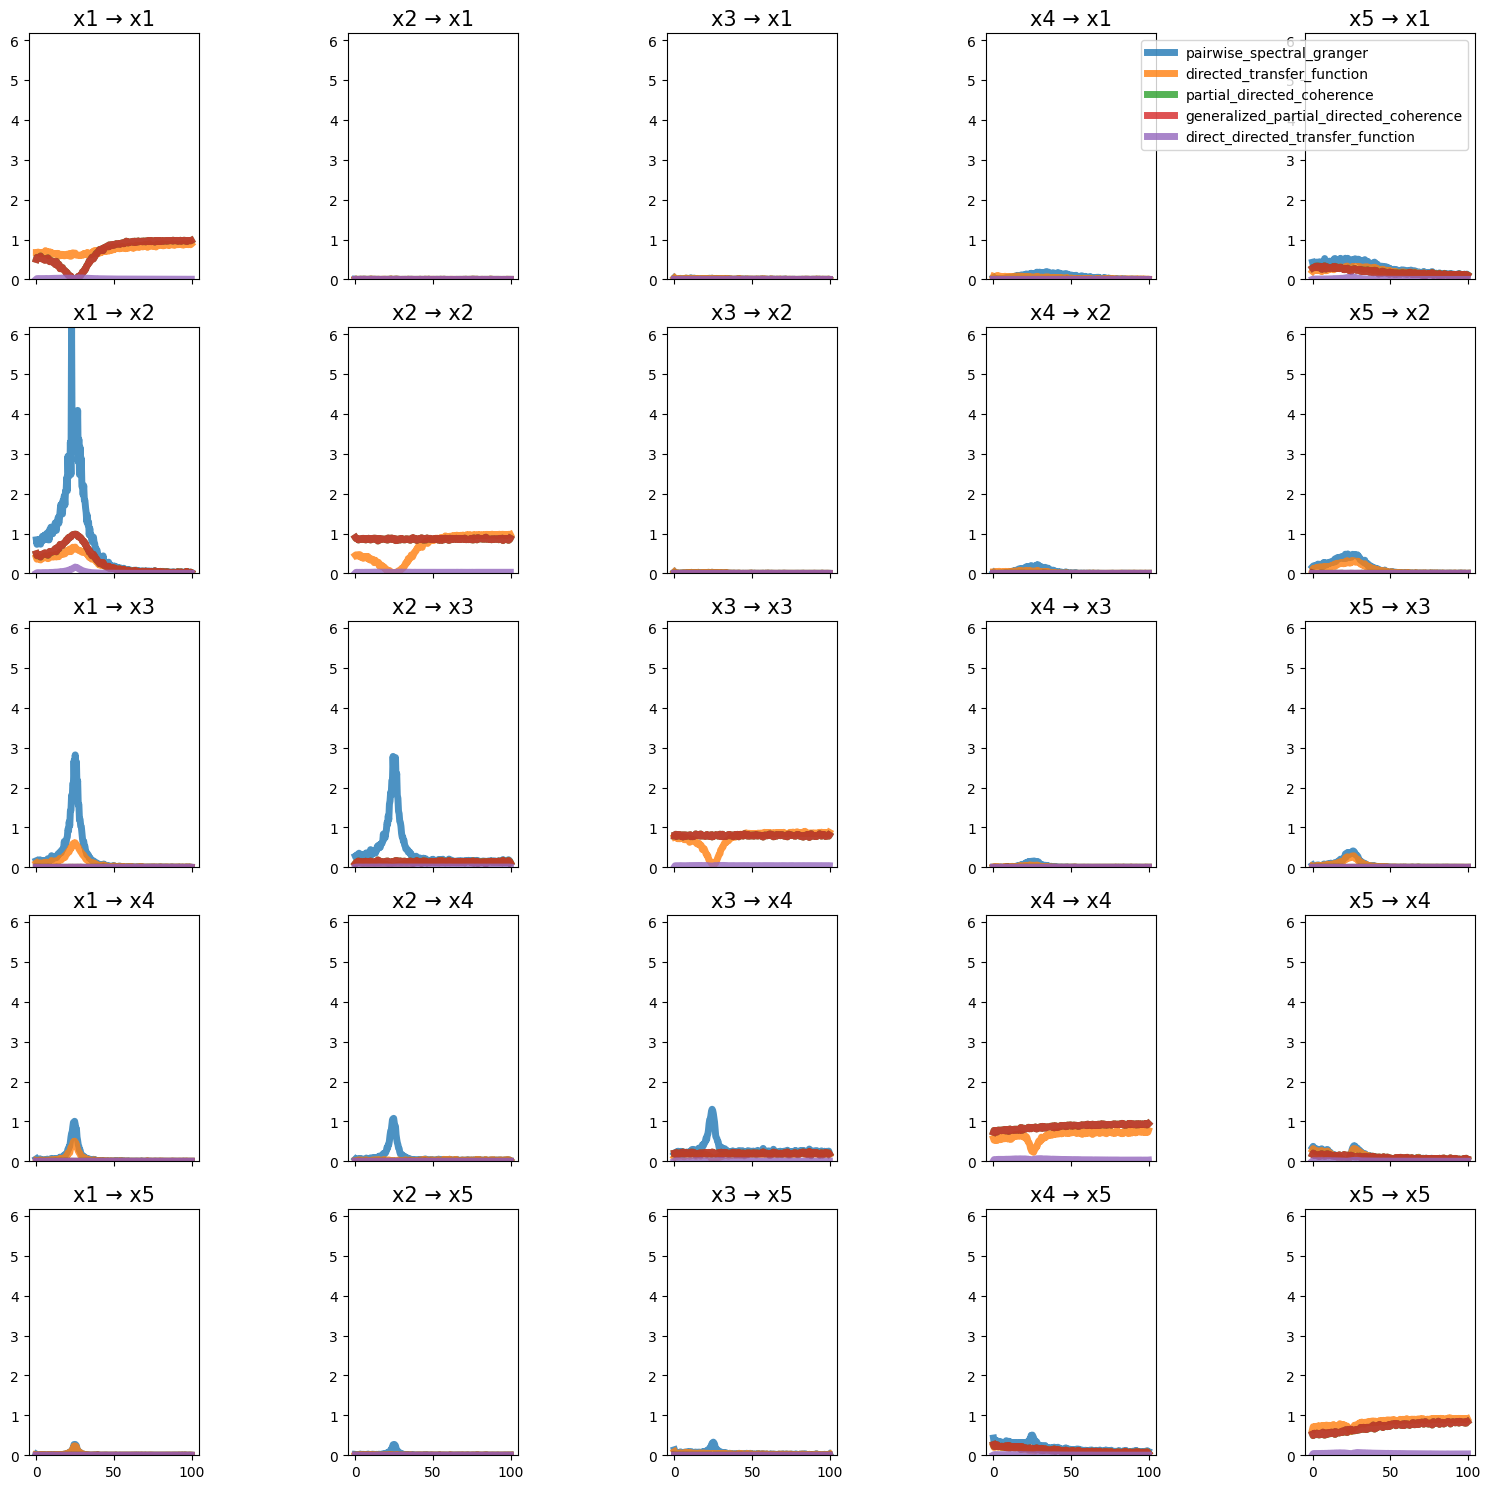

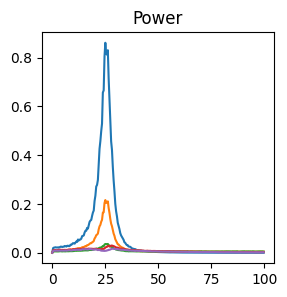

In [5]:
def baccala_example5():
    """Baccalá, L.A., and Sameshima, K. (2001). Partial directed coherence:
    a new concept in neural structure determination. Biological
    Cybernetics 84, 463–474.
    """
    sampling_frequency = 200
    n_time_samples, n_lags, n_signals = 510, 2, 5
    coefficients = np.zeros((n_lags, n_signals, n_signals))

    coefficients[0, 0, 0] = 0.95 * np.sqrt(2)
    coefficients[1, 0, 0] = -0.9025
    coefficients[1, 0, 4] = 0.5
    coefficients[0, 1, 0] = -0.50
    coefficients[1, 2, 1] = 0.40
    coefficients[0, 3, 2] = -0.50
    coefficients[0, 3, 3] = 0.25 * np.sqrt(2)
    coefficients[0, 3, 4] = 0.25 * np.sqrt(2)
    coefficients[0, 4, 3] = -0.25 * np.sqrt(2)
    coefficients[0, 4, 4] = 0.25 * np.sqrt(2)

    noise_covariance = None

    return (
        simulate_MVAR(
            coefficients,
            noise_covariance=noise_covariance,
            n_time_samples=n_time_samples,
            n_trials=500,
            n_burnin_samples=500,
        ),
        sampling_frequency,
    )


plot_directional(*baccala_example5(), time_halfbandwidth_product=1)

## Baccala Example 6

> Baccalá, L.A., and Sameshima, K. (2001). Partial directed coherence:
    a new concept in neural structure determination. Biological
    Cybernetics 84, 463–474.

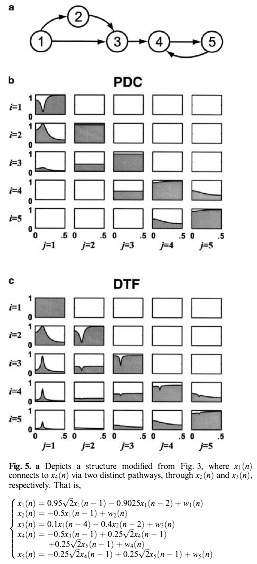

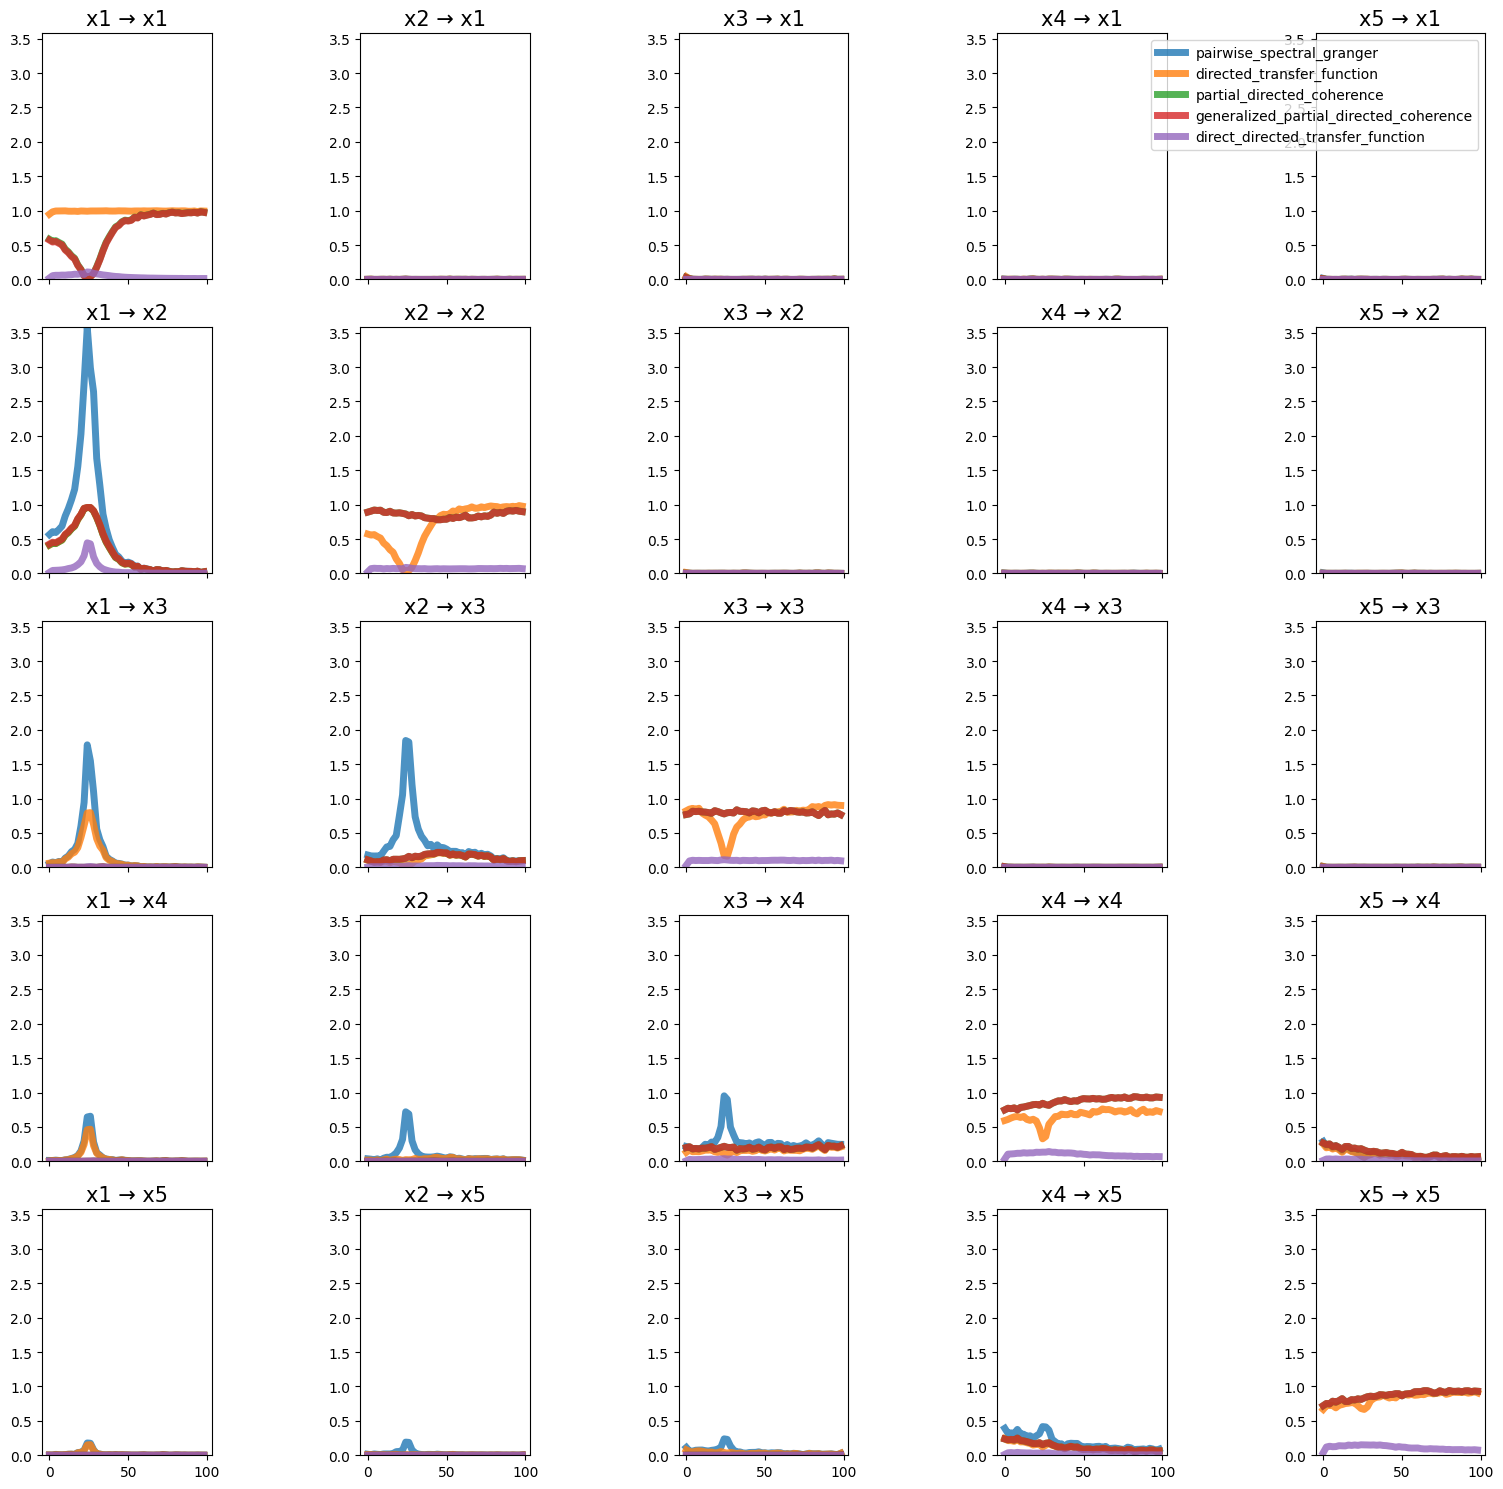

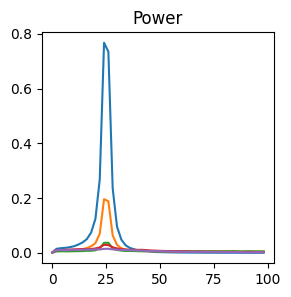

In [6]:
def baccala_example6():
    """Baccalá, L.A., and Sameshima, K. (2001). Partial directed coherence:
    a new concept in neural structure determination. Biological
    Cybernetics 84, 463–474.
    """
    sampling_frequency = 200
    n_time_samples, n_lags, n_signals = 100, 4, 5
    coefficients = np.zeros((n_lags, n_signals, n_signals))

    coefficients[0, 0, 0] = 0.95 * np.sqrt(2)
    coefficients[1, 0, 0] = -0.9025
    coefficients[0, 1, 0] = -0.50
    coefficients[3, 2, 1] = 0.10
    coefficients[1, 2, 1] = -0.40
    coefficients[0, 3, 2] = -0.50
    coefficients[0, 3, 3] = 0.25 * np.sqrt(2)
    coefficients[0, 3, 4] = 0.25 * np.sqrt(2)
    coefficients[0, 4, 3] = -0.25 * np.sqrt(2)
    coefficients[0, 4, 4] = 0.25 * np.sqrt(2)

    noise_covariance = None

    return (
        simulate_MVAR(
            coefficients,
            noise_covariance=noise_covariance,
            n_time_samples=n_time_samples,
            n_trials=500,
            n_burnin_samples=500,
        ),
        sampling_frequency,
    )


plot_directional(*baccala_example6(), time_halfbandwidth_product=1)

## Ding Example 1

> Ding, M., Chen, Y., and Bressler, S.L. (2006). 17 Granger causality:
    basic theory and application to neuroscience. Handbook of Time Series
    Analysis: Recent Theoretical Developments and Applications 437.
    
$$ x_1 = 0.9x_1(n-1) -0.5x_1(n-2) + w_1 $$
$$ x_2 = 0.8x_2(n-1) -0.5x_2(n-2) + 0.16x_1(n-1) -0.2x_1(n-2) + w_2 $$

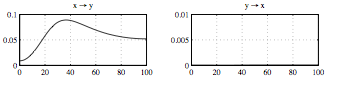

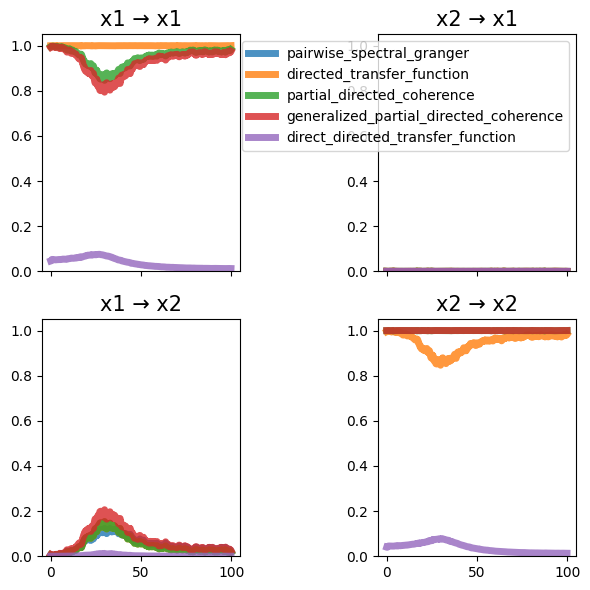

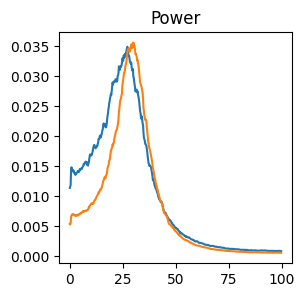

In [7]:
def ding_example1():
    """Ding, M., Chen, Y., and Bressler, S.L. (2006). 17 Granger causality:
    basic theory and application to neuroscience. Handbook of Time Series
    Analysis: Recent Theoretical Developments and Applications 437.
    """
    sampling_frequency = 200
    n_time_samples, n_lags, n_signals = 1000, 2, 2
    coefficients = np.zeros((n_lags, n_signals, n_signals))

    coefficients[0, ...] = np.array([[0.90, 0.00], [0.16, 0.80]])
    coefficients[1, ...] = np.array([[-0.50, 0.00], [-0.20, -0.50]])

    noise_covariance = np.array([[1.0, 0.4], [0.4, 0.7]])

    return (
        simulate_MVAR(
            coefficients,
            noise_covariance=noise_covariance,
            n_time_samples=n_time_samples,
            n_trials=500,
            n_burnin_samples=500,
        ),
        sampling_frequency,
    )


plot_directional(*ding_example1(), time_halfbandwidth_product=3)

## Ding Example 2a

> Ding, M., Chen, Y., and Bressler, S.L. (2006). 17 Granger causality:
    basic theory and application to neuroscience. Handbook of Time Series
    Analysis: Recent Theoretical Developments and Applications 437.
 
$$ x_1 = 0.8x_1(n-1) - 0.5x_1(n-2) + 0.4x_3(n-1) + 0.2x_2(n-2) + w_1 $$ 
$$ x_2 = 0.9x_2(n-1) - 0.8x_2(n-2) + w_2$$
$$ x_3 = 0.5x_3(n-1) - 0.2x_3(n-2) + 0.5x_2(n-1) + w_3$$
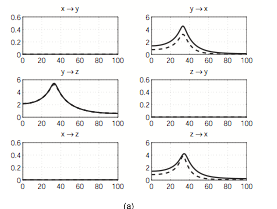

> dashed curves showing the results for the first model and the solid curves for the second model

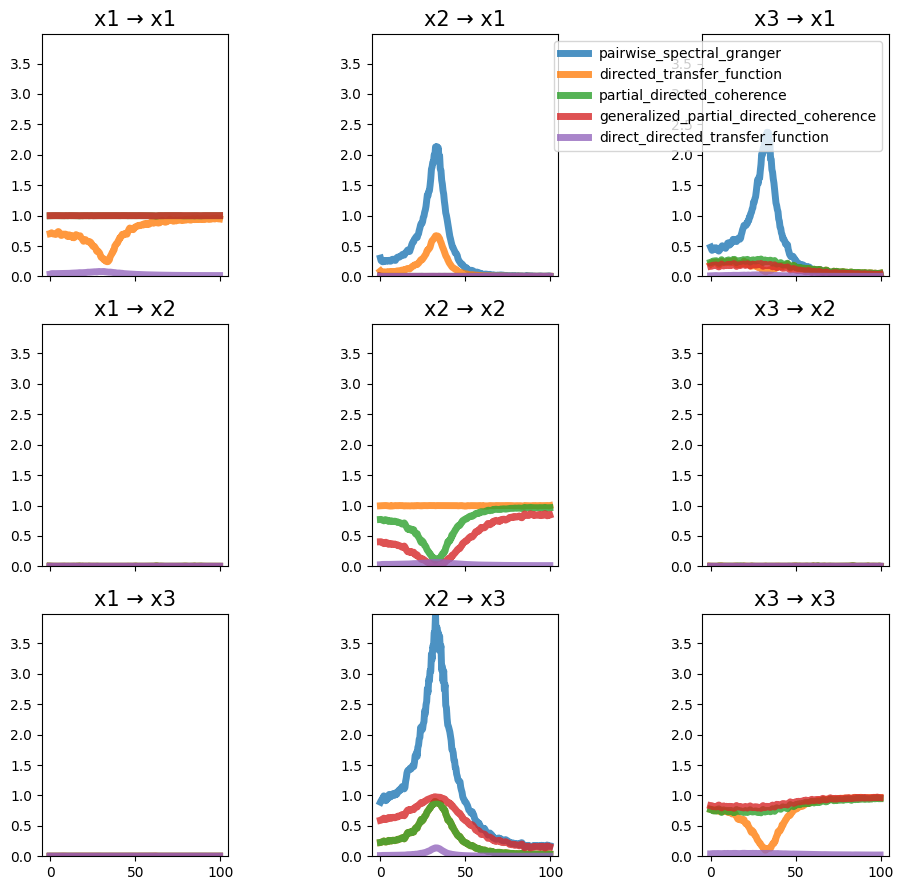

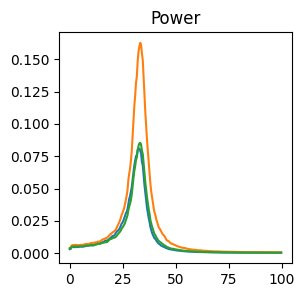

In [8]:
def ding_example2a():
    """Ding, M., Chen, Y., and Bressler, S.L. (2006). 17 Granger causality:
    basic theory and application to neuroscience. Handbook of Time Series Analysis:
    Recent Theoretical Developments and Applications 437."""
    sampling_frequency = 200
    n_time_samples, n_lags, n_signals = 500, 2, 3
    coefficients = np.zeros((n_lags, n_signals, n_signals))

    coefficients[0, :, :] = np.array(
        [[0.8, 0.0, 0.4], [0.0, 0.9, 0.0], [0.0, 0.5, 0.5]]
    )
    coefficients[1, :, :] = np.array(
        [[-0.5, 0.0, 0.0], [0.0, -0.8, 0.0], [0.0, 0.0, -0.2]]
    )

    noise_covariance = np.eye(n_signals) * [0.3, 1, 0.2]

    return (
        simulate_MVAR(
            coefficients,
            noise_covariance=noise_covariance,
            n_time_samples=n_time_samples,
            n_trials=500,
            n_burnin_samples=500,
        ),
        sampling_frequency,
    )


plot_directional(*ding_example2a())

## Ding Example 2b

> Ding, M., Chen, Y., and Bressler, S.L. (2006). 17 Granger causality:
    basic theory and application to neuroscience. Handbook of Time Series
    Analysis: Recent Theoretical Developments and Applications 437.
 
$$ x_1 = 0.8x_1(n-1) - 0.5x_1(n-2) + 0.4x_3(n-1) + 0.2x_2(n-2) + w_1 $$ 
$$ x_2 = 0.9x_2(n-1) - 0.8x_2(n-2) + w_2$$
$$ x_3 = 0.5x_3(n-1) - 0.2x_3(n-2) + 0.5x_2(n-1) + w_3$$
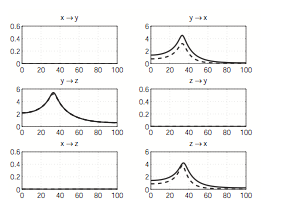

> dashed curves showing the results for the first model and the solid curves for the second model

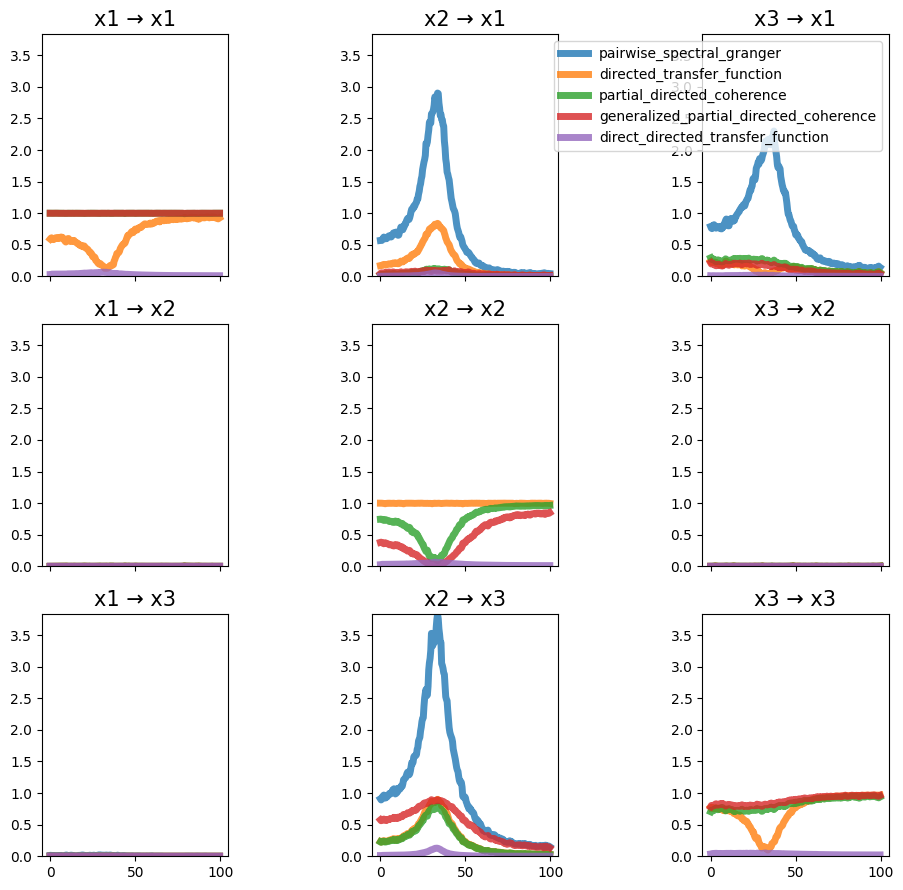

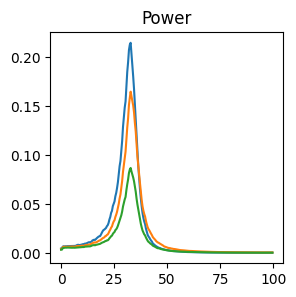

In [9]:
def ding_example2b():
    """Ding, M., Chen, Y., and Bressler, S.L. (2006). 17 Granger causality:
    basic theory and application to neuroscience. Handbook of Time Series Analysis:
    Recent Theoretical Developments and Applications 437."""
    sampling_frequency = 200
    n_time_samples, n_lags, n_signals = 500, 2, 3
    coefficients = np.zeros((n_lags, n_signals, n_signals))

    coefficients[0, :, :] = np.array(
        [[0.8, 0.0, 0.4], [0.0, 0.9, 0.0], [0.0, 0.5, 0.5]]
    )
    coefficients[1, :, :] = np.array(
        [[-0.5, 0.2, 0.0], [0.0, -0.8, 0.0], [0.0, 0.0, -0.2]]
    )

    noise_covariance = np.eye(n_signals) * [0.3, 1.0, 0.2]

    return (
        simulate_MVAR(
            coefficients,
            noise_covariance=noise_covariance,
            n_time_samples=n_time_samples,
            n_trials=500,
            n_burnin_samples=100,
        ),
        sampling_frequency,
    )


plot_directional(*ding_example2b(), time_halfbandwidth_product=2)

## Ding Example 3

> Ding, M., Chen, Y., and Bressler, S.L. (2006). 17 Granger causality:
    basic theory and application to neuroscience. Handbook of Time Series Analysis:
    Recent Theoretical Developments and Applications 437.
    
$$ x_1 = 0.95\sqrt2x_1(n-1) - 0.9025x_1(n-2) + w_1 $$
$$ x_2 = 0.5x_1(n-2) + w_2 $$
$$ x_3 = -0.4x_1(n-3) + w_3 $$
$$ x_4 = -0.5x_1(n-2) + 0.25\sqrt2x_4(n-1) + 0.25\sqrt2x_5(n-1) + w_4 $$
$$ x_5 = 0.25\sqrt2x_4(n-1) + 0.25\sqrt2x_5(n-1) + w_5 $$

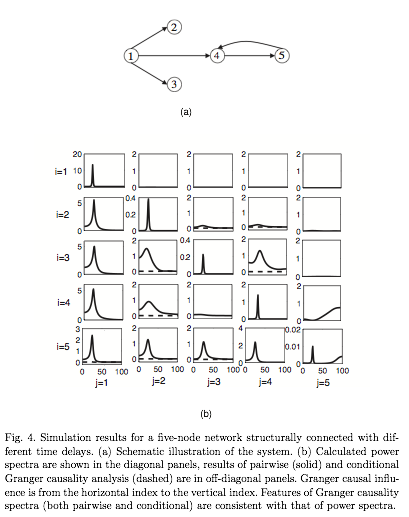

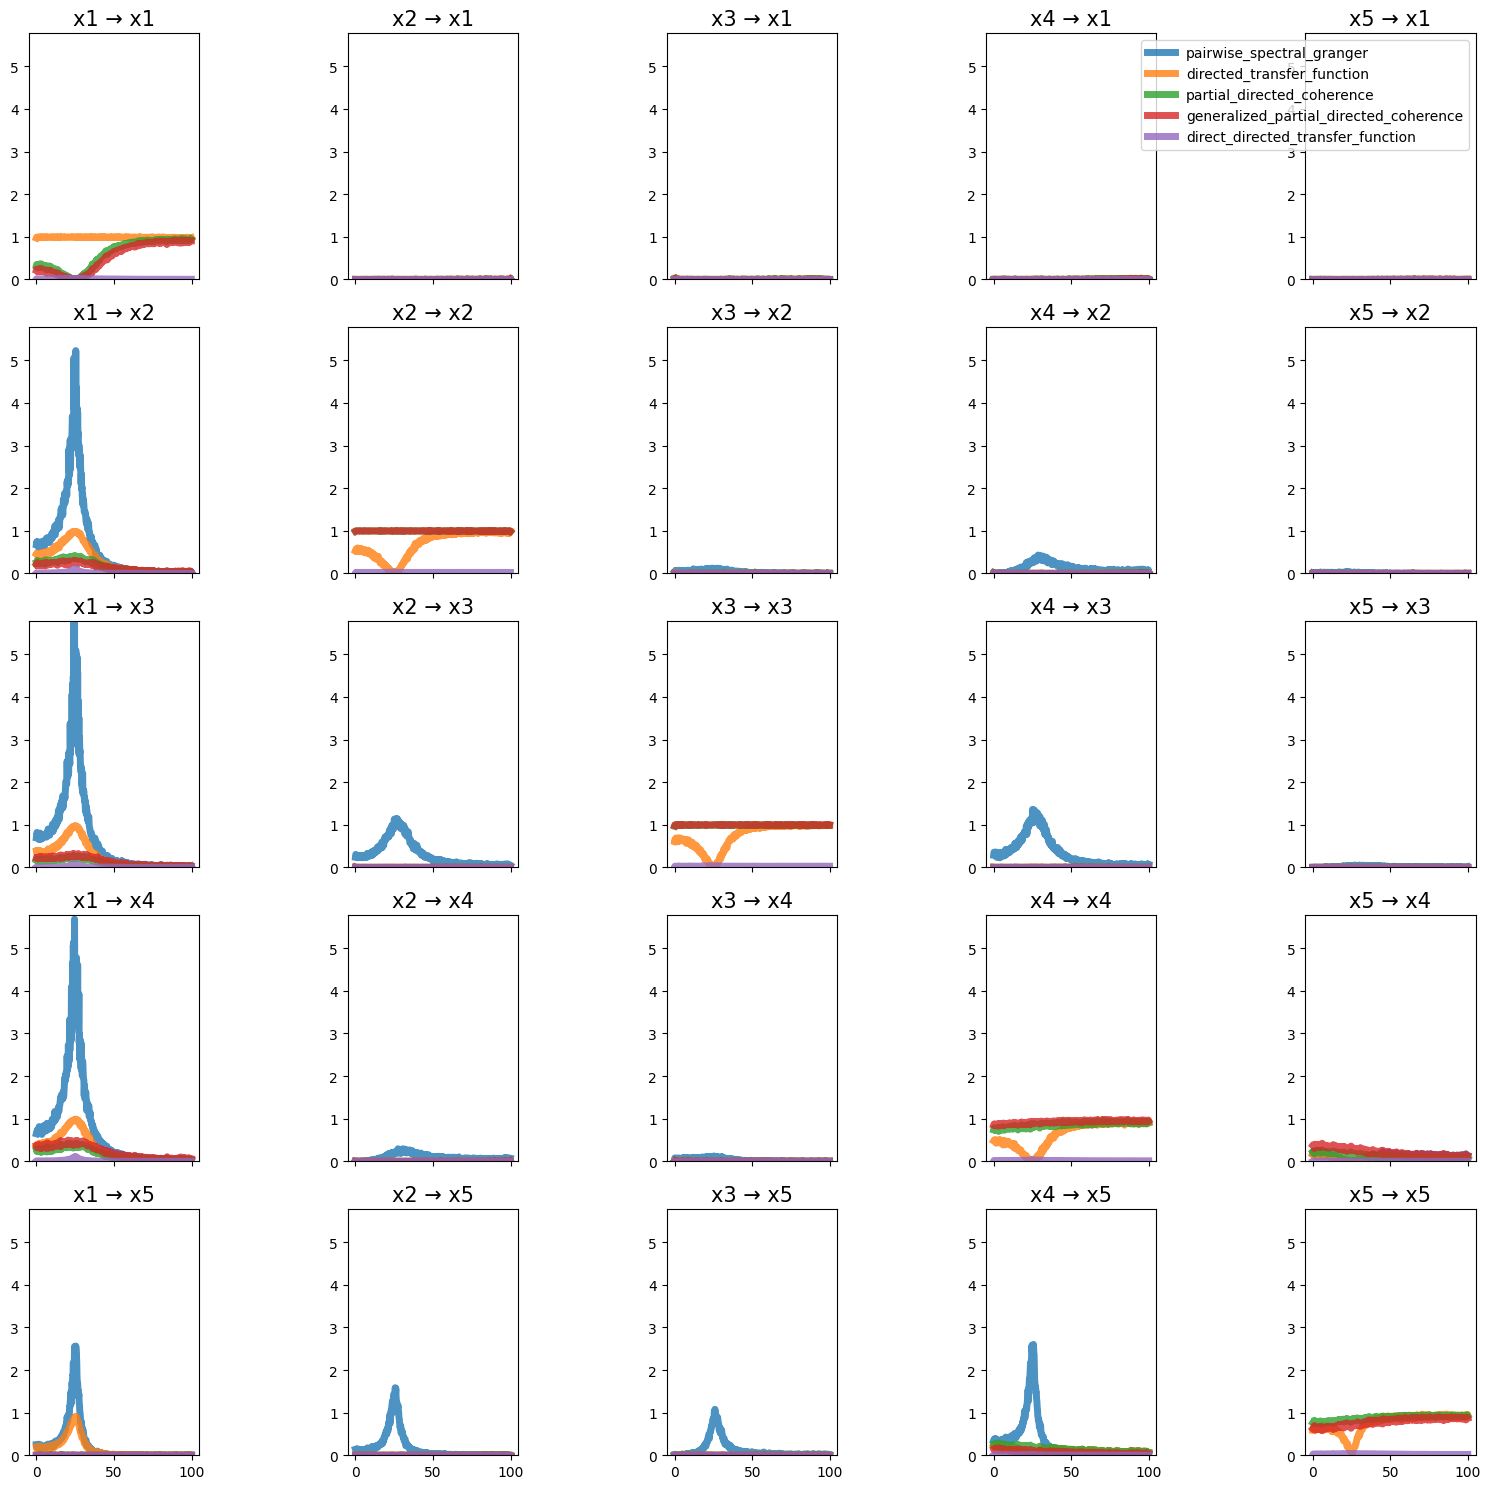

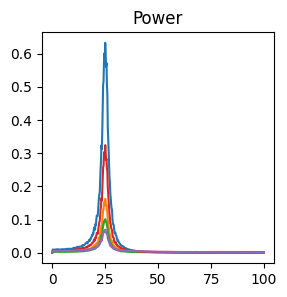

In [10]:
def ding_example3():
    """Ding, M., Chen, Y., and Bressler, S.L. (2006). 17 Granger causality:
    basic theory and application to neuroscience. Handbook of Time Series Analysis:
    Recent Theoretical Developments and Applications 437."""
    sampling_frequency = 200
    n_time_samples, n_lags, n_signals = 1000, 3, 5
    coefficients = np.zeros((n_lags, n_signals, n_signals))

    coefficients[0, 0, 0] = 0.95 * np.sqrt(2)
    coefficients[1, 0, 0] = -0.9025

    coefficients[1, 1, 0] = 0.50
    coefficients[2, 2, 0] = -0.40

    coefficients[1, 3, 0] = -0.50
    coefficients[0, 3, 3] = 0.25 * np.sqrt(2)
    coefficients[0, 3, 4] = 0.25 * np.sqrt(2)

    coefficients[0, 4, 3] = -0.25 * np.sqrt(2)
    coefficients[0, 4, 4] = 0.25 * np.sqrt(2)

    noise_covariance = np.eye(n_signals) * [0.6, 0.5, 0.3, 0.3, 0.6]

    return (
        simulate_MVAR(
            coefficients,
            noise_covariance=noise_covariance,
            n_time_samples=n_time_samples,
            n_trials=500,
            n_burnin_samples=500,
        ),
        sampling_frequency,
    )


plot_directional(*ding_example3(), time_halfbandwidth_product=1)

## Nedungadi Example 1

> Nedungadi, A.G., Ding, M., and Rangarajan, G. (2011). Block coherence: a method for measuring the interdependence between two blocks of neurobiological time series. Biological Cybernetics 104, 197–207.

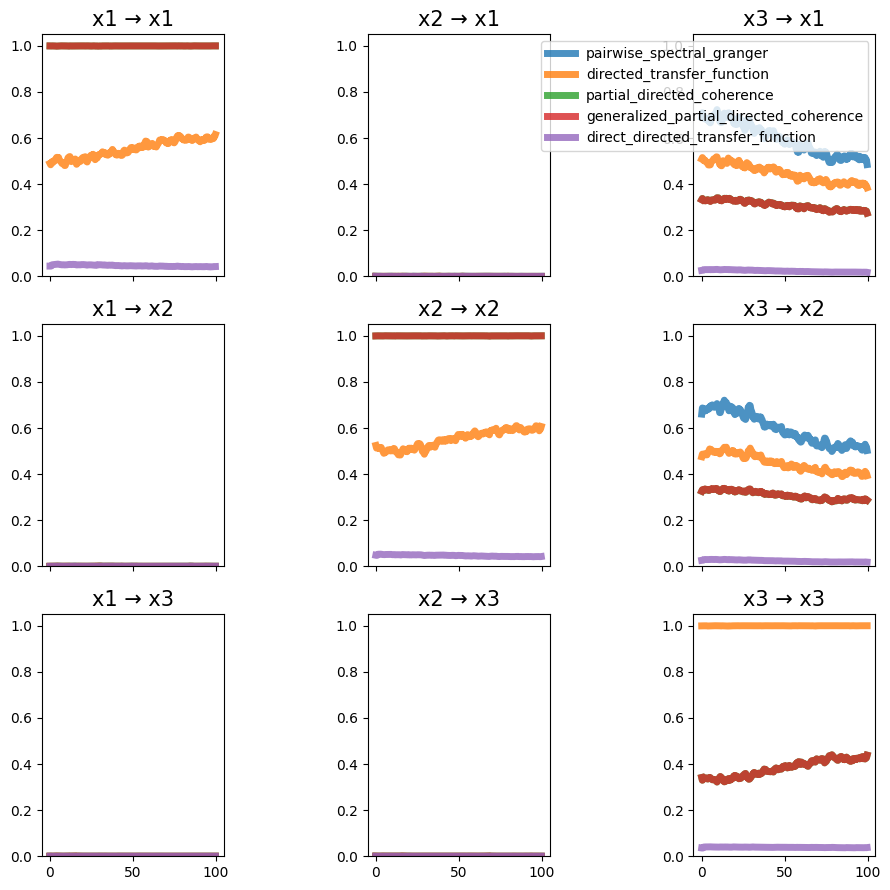

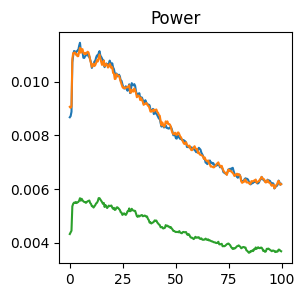

In [11]:
def Nedungadi_example1():
    """Nedungadi, A.G., Ding, M., and Rangarajan, G. (2011).
    Block coherence: a method for measuring the interdependence
    between two blocks of neurobiological time series. Biological
    Cybernetics 104, 197–207.
    """
    sampling_frequency = 200
    n_time_samples, n_lags, n_signals = 500, 1, 3
    coefficients = np.zeros((n_lags, n_signals, n_signals))

    coefficients[0, :, :] = np.array(
        [[0.1, 0.0, 0.9], [0.0, 0.1, 0.9], [0.0, 0.0, 0.1]]
    )

    noise_covariance = np.array([[0.9, 0.6, 0.0], [0.6, 0.9, 0.0], [0.0, 0.0, 0.9]])

    return (
        simulate_MVAR(
            coefficients,
            noise_covariance=noise_covariance,
            n_time_samples=n_time_samples,
            n_trials=1000,
            n_burnin_samples=500,
        ),
        sampling_frequency,
    )


plot_directional(*Nedungadi_example1(), time_halfbandwidth_product=3)

## Nedungadi Example 2

> Nedungadi, A.G., Ding, M., and Rangarajan, G. (2011). Block coherence: a method for measuring the interdependence between two blocks of neurobiological time series. Biological Cybernetics 104, 197–207.

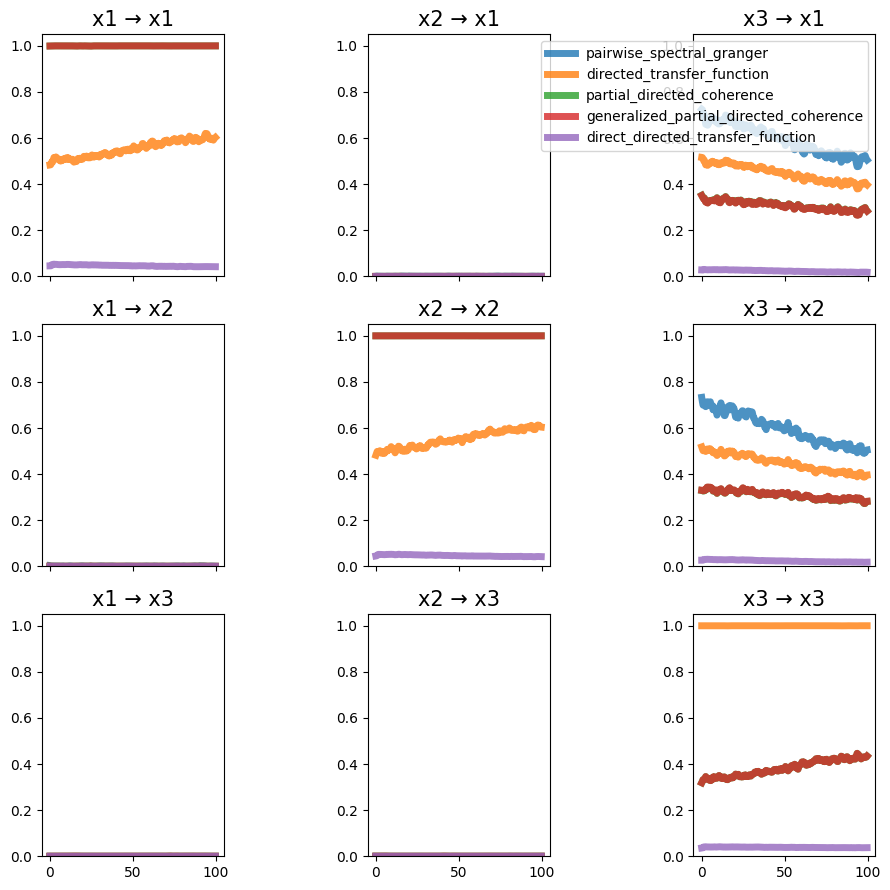

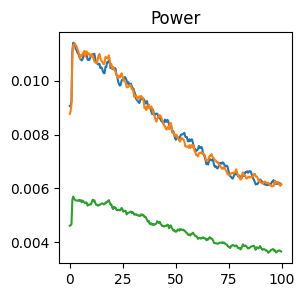

In [12]:
def Nedungadi_example2():
    """Nedungadi, A.G., Ding, M., and Rangarajan, G. (2011).
    Block coherence: a method for measuring the interdependence
    between two blocks of neurobiological time series. Biological
    Cybernetics 104, 197–207.
    """
    sampling_frequency = 200
    n_time_samples, n_lags, n_signals = 500, 1, 3
    coefficients = np.zeros((n_lags, n_signals, n_signals))

    coefficients[0, :, :] = np.array(
        [[0.1, 0.0, 0.9], [0.0, 0.1, 0.9], [0.0, 0.0, 0.1]]
    )

    noise_covariance = np.array([[0.9, 0.0, 0.0], [0.0, 0.9, 0.0], [0.0, 0.0, 0.9]])

    return (
        simulate_MVAR(
            coefficients,
            noise_covariance=noise_covariance,
            n_time_samples=n_time_samples,
            n_trials=1000,
            n_burnin_samples=500,
        ),
        sampling_frequency,
    )


plot_directional(*Nedungadi_example2(), time_halfbandwidth_product=3)

## Wen Example 1

> Wen, X., Rangarajan, G., and Ding, M. (2013). Multivariate Granger causality: an estimation framework based on factorization of the spectral density matrix. Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences 371, 20110610–20110610.

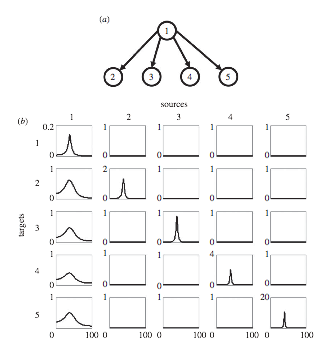

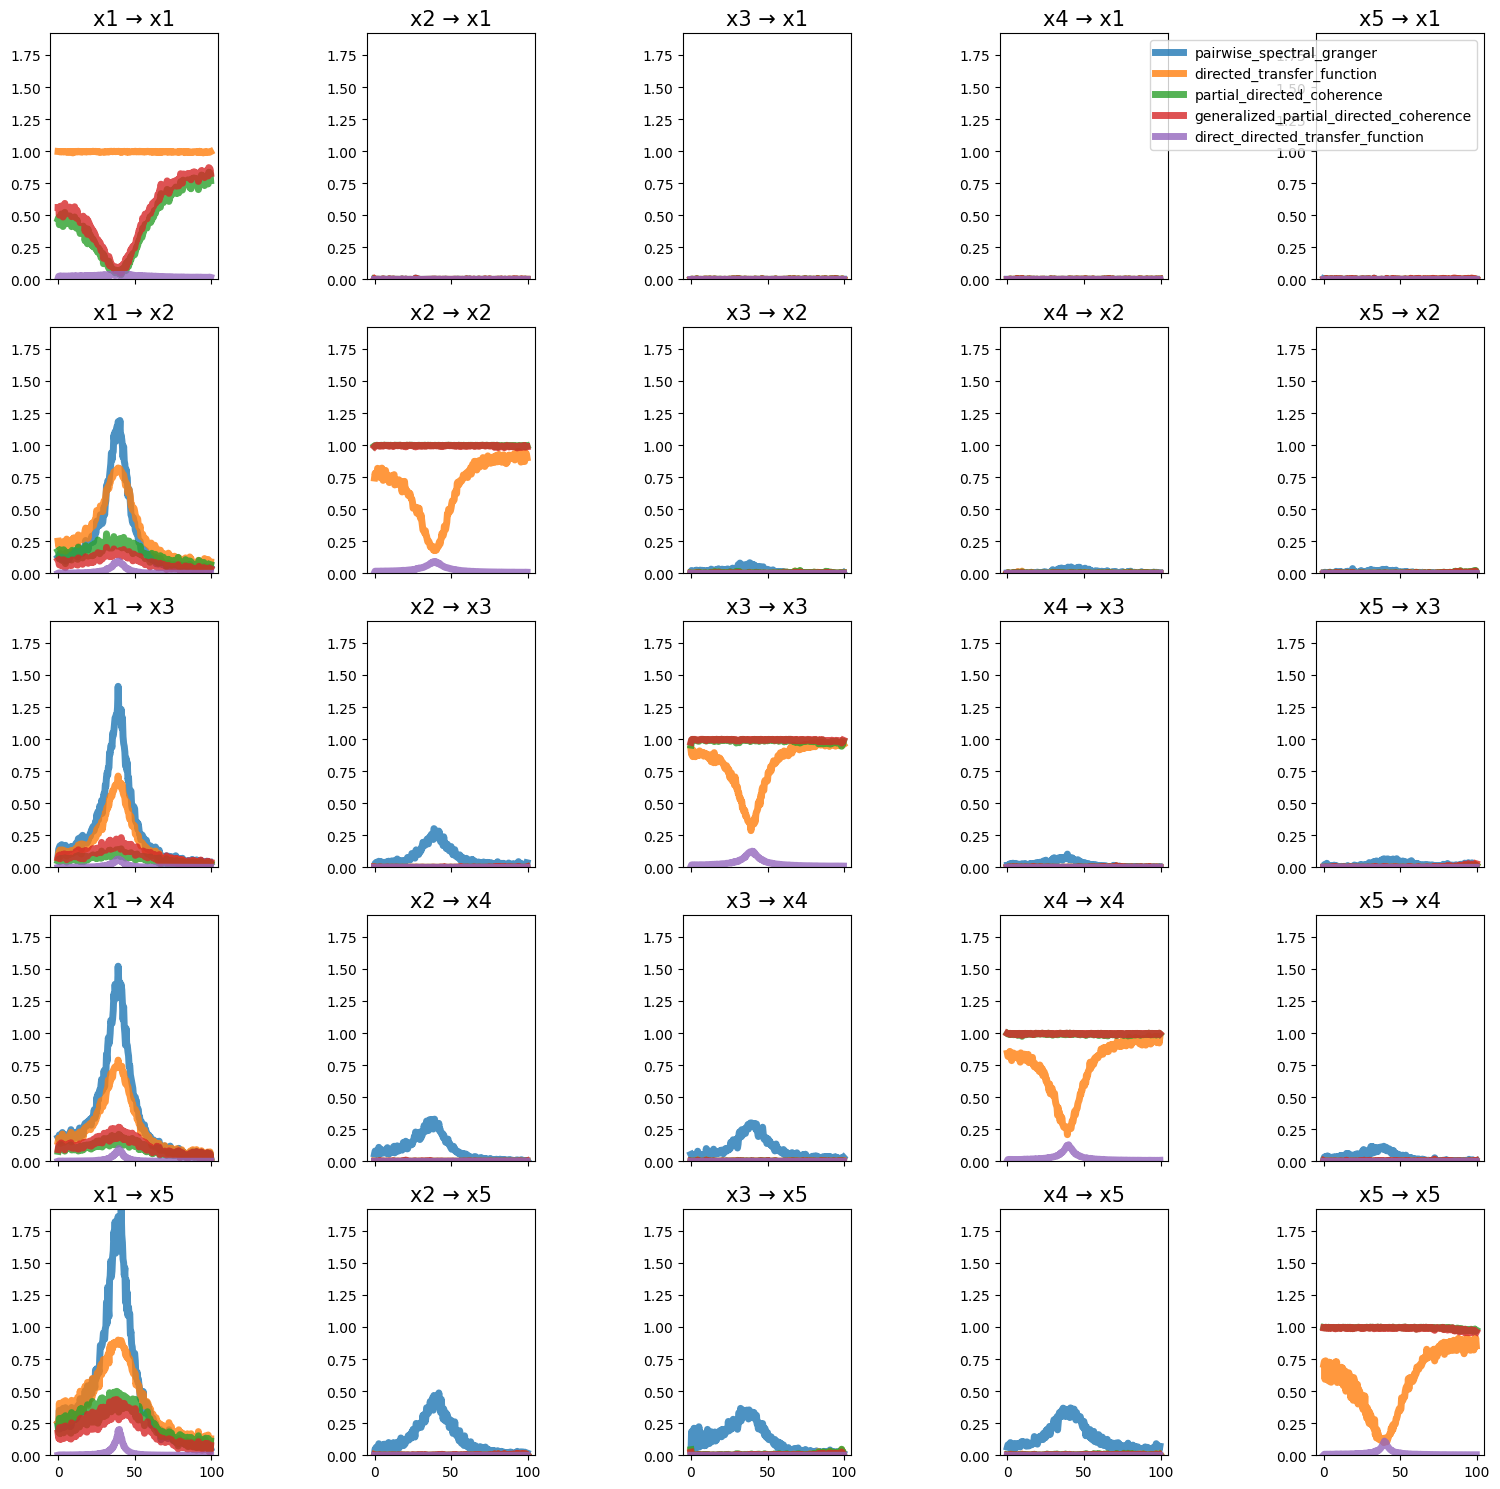

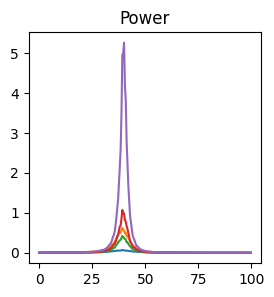

In [13]:
def Wen_example1():
    sampling_frequency = 200
    n_time_samples, n_lags, n_signals = 500, 4, 5
    coefficients = np.zeros((n_lags, n_signals, n_signals))

    coefficients[0, 0, 0] = 0.55
    coefficients[1, 0, 0] = -0.70
    coefficients[0, 1, 1] = 0.56
    coefficients[1, 1, 1] = -0.75
    coefficients[0, 1, 0] = 0.60
    coefficients[0, 2, 2] = 0.57
    coefficients[1, 2, 2] = -0.80
    coefficients[1, 2, 0] = 0.40
    coefficients[0, 3, 3] = 0.58
    coefficients[1, 3, 3] = -0.85
    coefficients[2, 3, 0] = 0.50
    coefficients[0, 4, 4] = 0.59
    coefficients[1, 4, 4] = -0.90
    coefficients[3, 4, 0] = 0.80

    noise_covariance = np.eye(n_signals) * [1.0, 2.0, 0.8, 1.0, 1.5]

    return (
        simulate_MVAR(
            coefficients,
            noise_covariance=noise_covariance,
            n_time_samples=n_time_samples,
            n_trials=500,
            n_burnin_samples=500,
        ),
        sampling_frequency,
    )


plot_directional(*Wen_example1(), time_halfbandwidth_product=1)

## Wen Example 2

> Wen, X., Rangarajan, G., and Ding, M. (2013). Multivariate Granger causality: an estimation framework based on factorization of the spectral density matrix. Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences 371, 20110610–20110610.

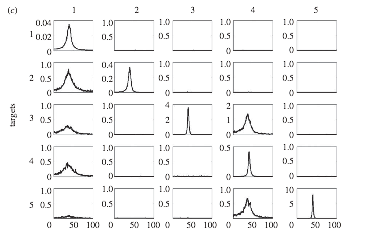

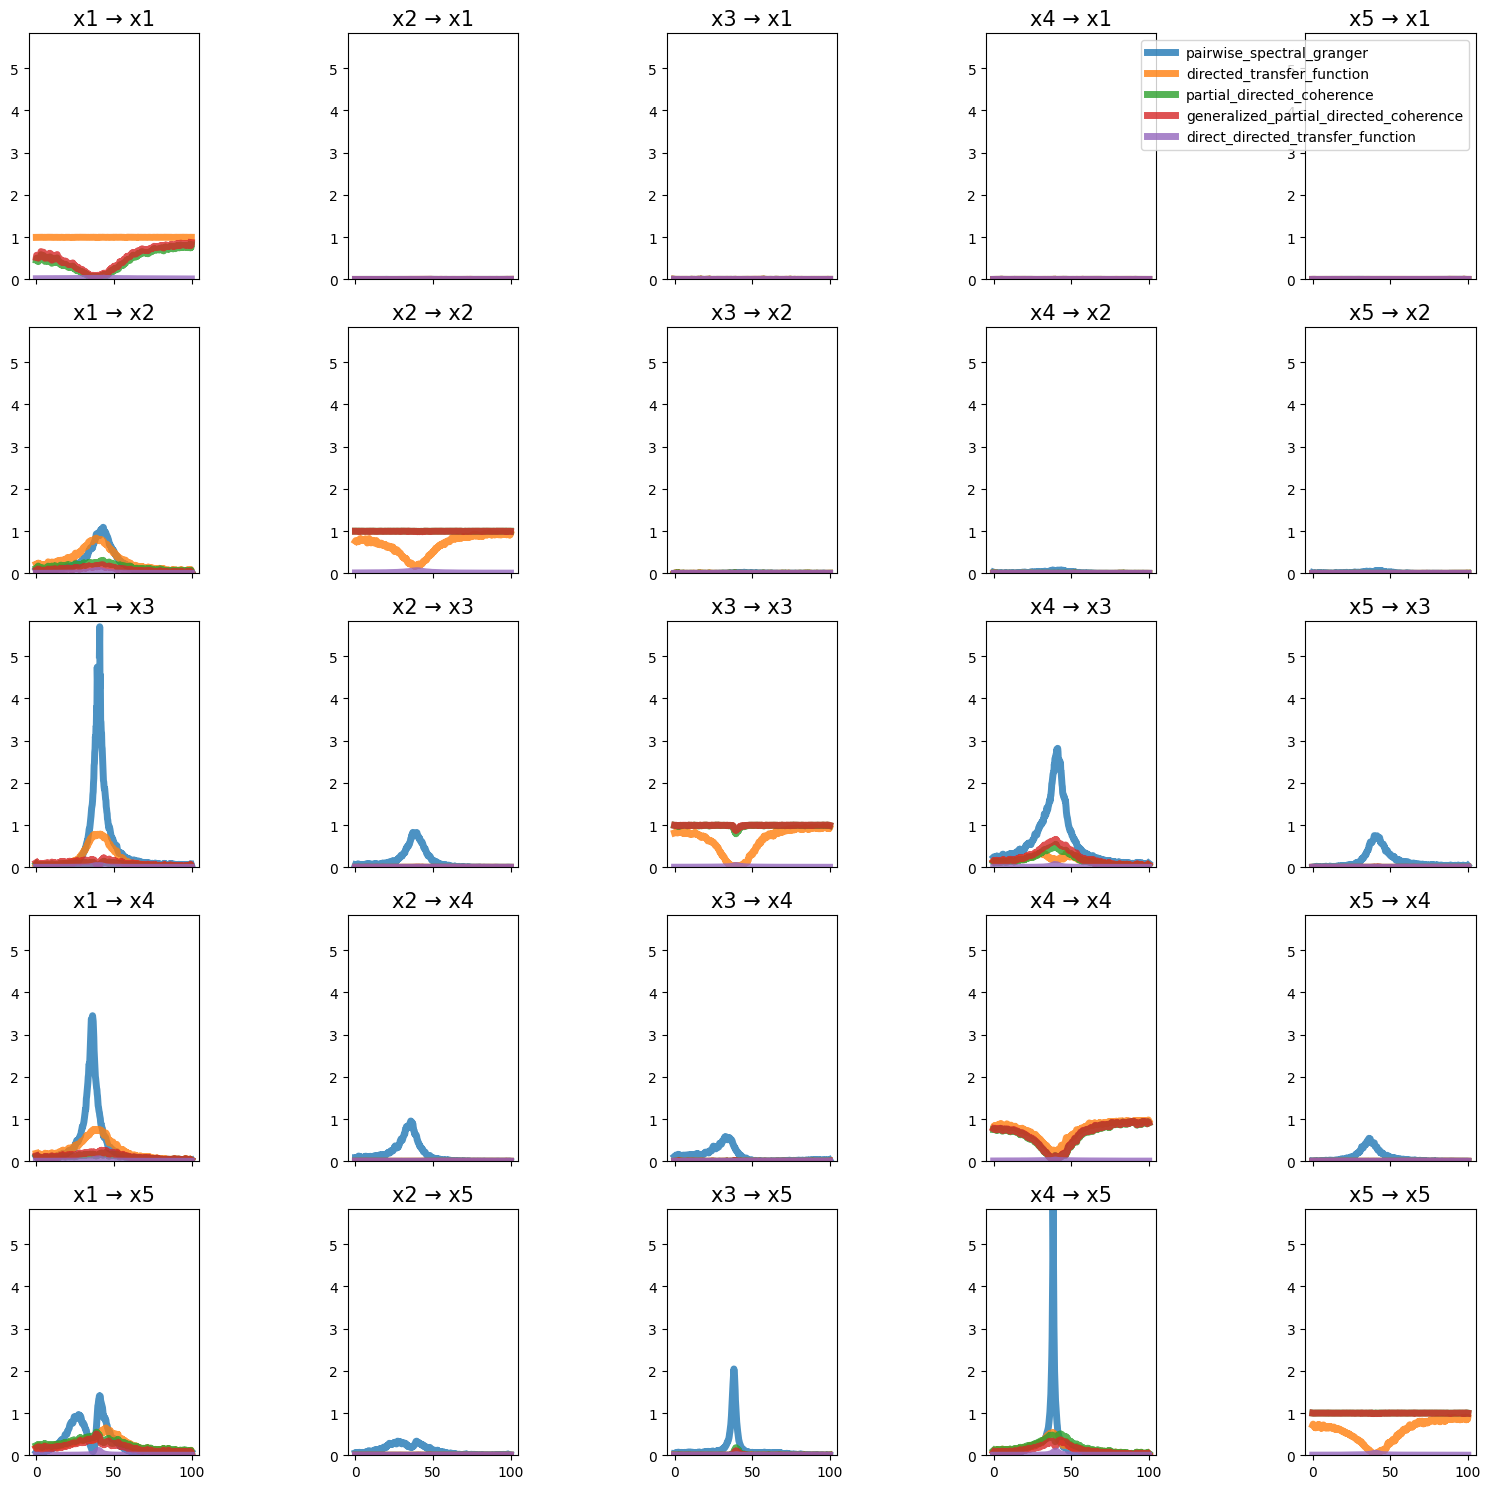

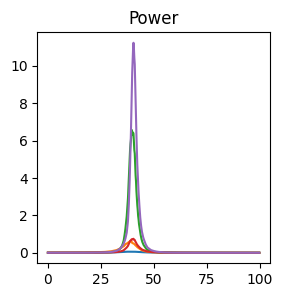

In [14]:
def Wen_example2():
    sampling_frequency = 200
    n_time_samples, n_lags, n_signals = 1000, 4, 5
    coefficients = np.zeros((n_lags, n_signals, n_signals))

    coefficients[0, 0, 0] = 0.55
    coefficients[1, 0, 0] = -0.70
    coefficients[0, 1, 1] = 0.56
    coefficients[1, 1, 1] = -0.75
    coefficients[0, 1, 0] = 0.60
    coefficients[0, 2, 2] = 0.57
    coefficients[1, 2, 2] = -0.80
    coefficients[1, 2, 0] = 0.40
    coefficients[0, 3, 3] = 0.58
    coefficients[1, 3, 3] = -0.85
    coefficients[2, 3, 0] = 0.50
    coefficients[0, 4, 4] = 0.59
    coefficients[1, 4, 4] = -0.90
    coefficients[3, 4, 0] = 0.80

    coefficients[0, 2, 3] = -0.50
    coefficients[0, 4, 3] = -0.50

    noise_covariance = np.ones((n_signals, n_signals)) * 0.5
    diagonal_ind = np.arange(0, n_signals)
    noise_covariance[diagonal_ind, diagonal_ind] = [1.0, 2.0, 0.8, 1.0, 1.5]

    return (
        simulate_MVAR(
            coefficients,
            noise_covariance=noise_covariance,
            n_time_samples=n_time_samples,
            n_trials=200,
            n_burnin_samples=100,
        ),
        sampling_frequency,
    )


plot_directional(*Wen_example2(), time_halfbandwidth_product=3)

## Dhamala Example 1

> Dhamala, M., Rangarajan, G., and Ding, M. (2008). Analyzing information flow in brain networks with nonparametric Granger causality. NeuroImage 41, 354–362.

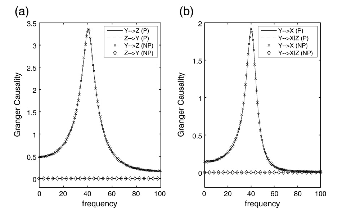

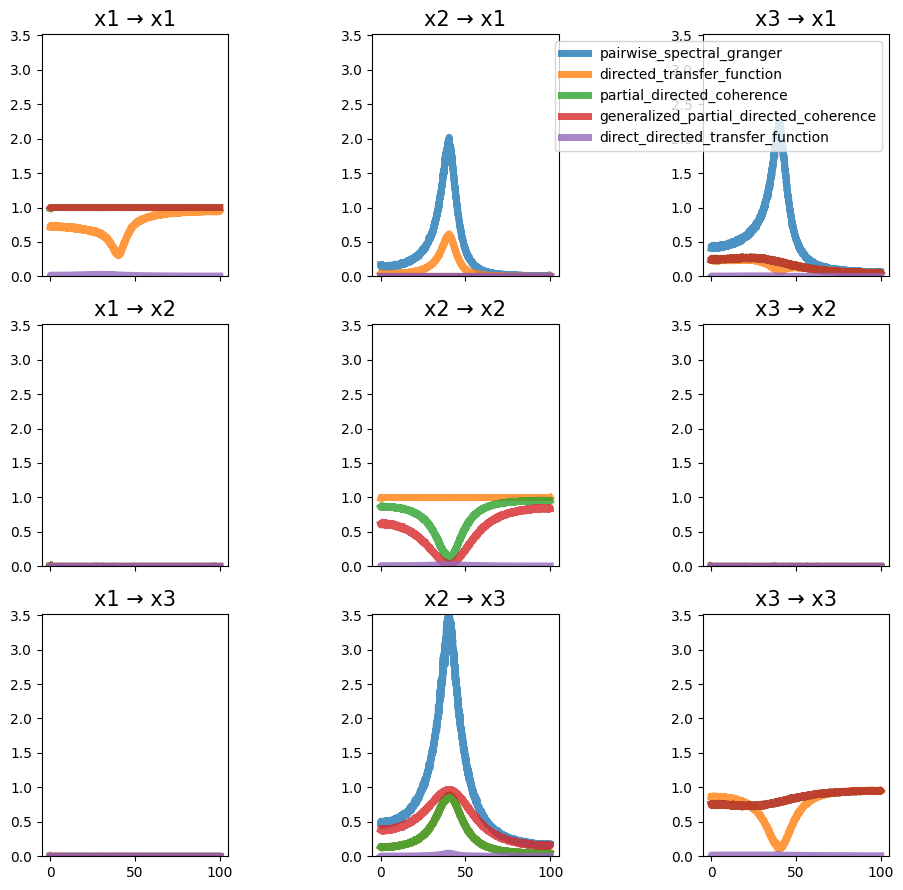

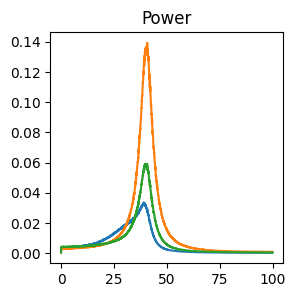

In [15]:
def Dhamala_example1():
    sampling_frequency = 200
    n_time_samples, n_lags, n_signals = 4000, 2, 3
    coefficients = np.zeros((n_lags, n_signals, n_signals))

    coefficients[0, 0, 0] = 0.80
    coefficients[1, 0, 0] = -0.50
    coefficients[0, 0, 2] = 0.40
    coefficients[0, 1, 1] = 0.53
    coefficients[1, 1, 1] = -0.80
    coefficients[0, 2, 2] = 0.50
    coefficients[1, 2, 2] = -0.20
    coefficients[0, 2, 1] = 0.50

    noise_covariance = np.eye(n_signals) * [0.25, 1.00, 0.25]
    return (
        simulate_MVAR(
            coefficients,
            noise_covariance=noise_covariance,
            n_time_samples=n_time_samples,
            n_trials=4000,
            n_burnin_samples=1000,
        ),
        sampling_frequency,
    )


plot_directional(*Dhamala_example1(), time_halfbandwidth_product=1)

## Dhamala Example 2

> Dhamala, M., Rangarajan, G., and Ding, M. (2008). Analyzing information flow in brain networks with nonparametric Granger causality. NeuroImage 41, 354–362.

Text(0, 0.5, 'Frequency')

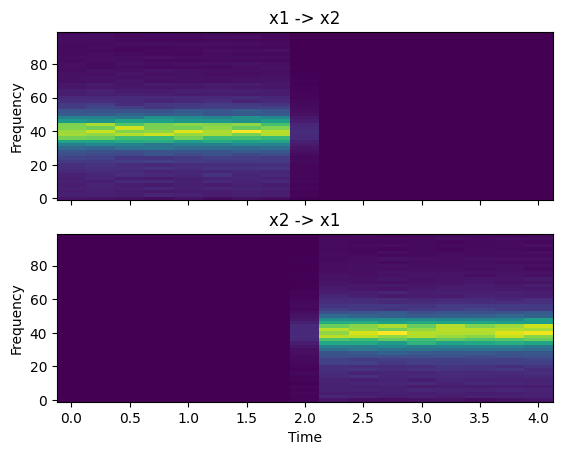

In [16]:
def Dhamala_example2a():
    sampling_frequency = 200
    n_time_samples, n_lags, n_signals = 450, 2, 2
    coefficients = np.zeros((n_lags, n_signals, n_signals))

    coefficients[0, 0, 0] = 0.53
    coefficients[1, 0, 0] = -0.80
    coefficients[0, 0, 1] = 0.50
    coefficients[0, 1, 1] = 0.53
    coefficients[1, 1, 1] = -0.80
    coefficients[0, 1, 0] = 0.00

    noise_covariance = np.eye(n_signals) * [0.25, 0.25]
    return (
        simulate_MVAR(
            coefficients,
            noise_covariance=noise_covariance,
            n_time_samples=n_time_samples,
            n_trials=1000,
            n_burnin_samples=1000,
        ),
        sampling_frequency,
    )


def Dhamala_example2b():
    sampling_frequency = 200
    n_time_samples, n_lags, n_signals = 450, 2, 2
    coefficients = np.zeros((n_lags, n_signals, n_signals))

    coefficients[0, 0, 0] = 0.53
    coefficients[1, 0, 0] = -0.80
    coefficients[0, 0, 1] = 0.00
    coefficients[0, 1, 1] = 0.53
    coefficients[1, 1, 1] = -0.80
    coefficients[0, 1, 0] = 0.50

    noise_covariance = np.eye(n_signals) * [0.25, 0.25]
    return (
        simulate_MVAR(
            coefficients,
            noise_covariance=noise_covariance,
            n_time_samples=n_time_samples,
            n_trials=1000,
            n_burnin_samples=1000,
        ),
        sampling_frequency,
    )


time_series1, sampling_frequency = Dhamala_example2a()
time_series2, _ = Dhamala_example2b()
time_series = np.concatenate((time_series1, time_series2), axis=0)

time_halfbandwidth_product = 1

m = Multitaper(
    prepare_time_series(time_series),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=0,
    time_window_duration=0.500,
    time_window_step=0.250,
)
c = Connectivity.from_multitaper(m)
granger = c.pairwise_spectral_granger_prediction()

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True)

ax[0].pcolormesh(
    c.time, c.frequencies, granger[..., :, 0, 1].T, cmap="viridis", shading="auto"
)
ax[0].set_title("x1 -> x2")
ax[0].set_ylabel("Frequency")
ax[1].pcolormesh(
    c.time, c.frequencies, granger[..., :, 1, 0].T, cmap="viridis", shading="auto"
)
ax[1].set_title("x2 -> x1")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

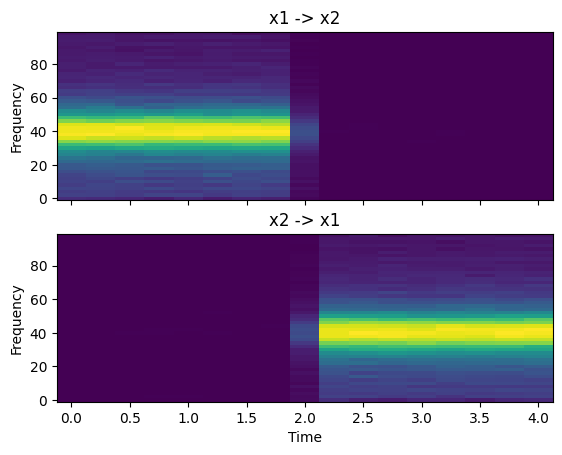

In [17]:
dtf = c.directed_transfer_function()

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True)

ax[0].pcolormesh(
    c.time, c.frequencies, dtf[..., :, 0, 1].T, cmap="viridis", shading="auto"
)
ax[0].set_title("x1 -> x2")
ax[0].set_ylabel("Frequency")
ax[1].pcolormesh(
    c.time, c.frequencies, dtf[..., :, 1, 0].T, cmap="viridis", shading="auto"
)
ax[1].set_title("x2 -> x1")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

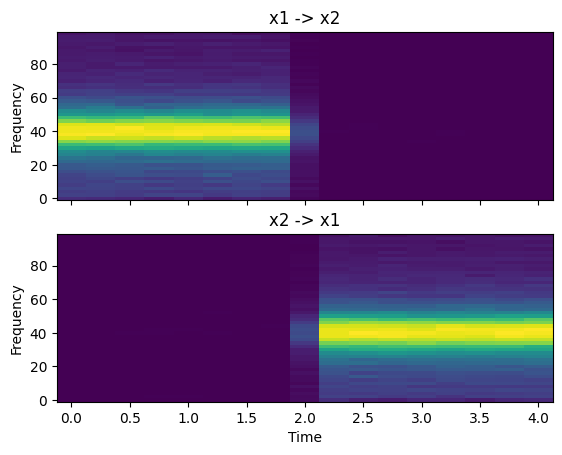

In [18]:
pdc = c.partial_directed_coherence()

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True)

ax[0].pcolormesh(c.time, c.frequencies, pdc[..., :, 0, 1].T, cmap="viridis")
ax[0].set_title("x1 -> x2")
ax[0].set_ylabel("Frequency")
ax[1].pcolormesh(c.time, c.frequencies, pdc[..., :, 1, 0].T, cmap="viridis")
ax[1].set_title("x2 -> x1")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Frequency")